# Boston Housing Dataset
Each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

Challenges:

1.Missing value treatment

2.Outlier treatment

3.Understanding which variables drive the price of homes in Boston

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
os.listdir(".")

['.ipynb_checkpoints',
 'Boston Housing Predicition.ipynb',
 'BostonHousingData.csv',
 'housing.csv',
 'practice_0nline.ipynb',
 'Practice_offline.ipynb']

In [3]:
df = pd.read_csv("BostonHousingData.csv")

In [4]:
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560262,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [7]:
df.shape

(506, 14)

In [8]:
# null values
print(df.isna().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [9]:
# empty value
print((df == 0.0).sum())

CRIM         0
ZN         360
INDUS        0
CHAS       452
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64


In [10]:
# 1.Replacing Null value with 0.0
# 2.Replacing 0.0 with mean
# 3.Randomizing data
data_df = df.replace(np.nan,0.0)              #1
data_df = data_df.replace(0.0,data_df.mean()) #2
#data_df = data_df.sample(frac=1)             #3
display(data_df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.000000,2.31,0.067194,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,10.768775,7.07,0.067194,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,10.768775,7.07,0.067194,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,10.768775,2.18,0.067194,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,10.768775,2.18,0.067194,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.212846,36.2


In [11]:
# orignla data
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [12]:
# working on updated data

features = data_df.iloc[:,:-1]
labels = data_df.iloc[:,-1:]
display(features.head())
display(labels.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.000000,2.31,0.067194,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,10.768775,7.07,0.067194,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,10.768775,7.07,0.067194,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,10.768775,2.18,0.067194,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,10.768775,2.18,0.067194,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.212846


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
# converting dataframe in to numpy array
features = features.values
labels = labels.values

In [14]:
labels = labels.ravel() # turning column to row
print(labels)
print()
print(features)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

# Normalizing data (through Library)

In [15]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
features = scale.fit_transform(features)
print(features)

[[-0.42166527 -0.04410855 -1.30831657 ... -1.45900038  0.44105193
  -1.10120285]
 [-0.41920667 -0.41672544 -0.59713492 ... -0.30309415  0.44105193
  -0.50746763]
 [-0.41920901 -0.41672544 -0.59713492 ... -0.30309415  0.39642699
  -1.23679142]
 ...
 [-0.4152886  -0.41672544  0.12898751 ...  1.17646583  0.44105193
  -1.00700447]
 [-0.40956904 -0.41672544  0.12898751 ...  1.17646583  0.4032249
  -0.88711563]
 [-0.41685231 -0.41672544  0.12898751 ...  1.17646583  0.44105193
  -0.68730089]]


#  Normalizing data (Manually)

In [16]:
# Normalizing data

#mean = features.mean(axis=0)
#features -= mean
#std = features.std(axis=0)
#features /= std
#print(features)

# Test Train Split

In [17]:
# split in training 80%, test 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

print("train :",x_train.shape)
print("train label :",y_train.shape)
print("test :",x_test.shape)
print("test label:",y_test.shape)

train : (404, 13)
train label : (404,)
test : (102, 13)
test label: (102,)


# First Model

In [18]:
input_shape = 13

models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Dense(64,activation="relu",input_shape=(input_shape,)),
                layers.Dense(32,activation="relu"),
                layers.Dense(16,activation="relu"),
                layers.Dense(1)])

model.compile(optimizer="rmsprop", # adam
             loss="mse",
             metrics=["mae"])

history = model.fit(x_train,y_train,epochs=100,validation_split=(0.2))

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 2s 5ms/sample - loss: 565.6607 - mae: 22.0828 - val_loss: 502.5291 - val_mae: 20.5040
Epoch 2/100
323/323 [==============================] - 0s 275us/sample - loss: 490.4125 - mae: 20.4056 - val_loss: 423.8559 - val_mae: 18.5758
Epoch 3/100
323/323 [==============================] - 0s 257us/sample - loss: 400.6380 - mae: 18.0936 - val_loss: 330.9981 - val_mae: 16.1670
Epoch 4/100
323/323 [==============================] - 0s 278us/sample - loss: 297.5001 - mae: 15.2173 - val_loss: 222.0417 - val_mae: 12.9722
Epoch 5/100
323/323 [==============================] - 0s 257us/sample - loss: 187.6097 - mae: 11.5890 - val_loss: 129.1451 - val_mae: 9.5900
Epoch 6/100
323/323 [==============================] - 0s 251us/sample - loss: 107.1876 - mae: 8.0968 - val_loss: 78.7996 - val_mae: 7.0115
Epoch 7/100
323/323 [==============================] - 0s 260us/sample - loss: 69.2645 - mae: 6.2776 - 

In [19]:
evaluation = model.evaluate(x_test,y_test,verbose=2)
print()
print("loss: ",evaluation[0])
print("MSE:  ",evaluation[1])

102/1 - 0s - loss: 19.2351 - mae: 2.7786

loss:  12.090548982807235
MSE:   2.7785602


# Plotting

In [20]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

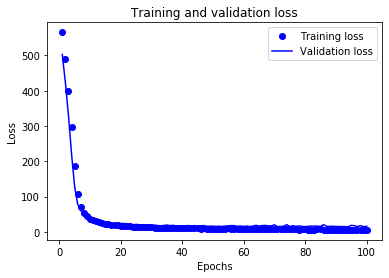

In [21]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

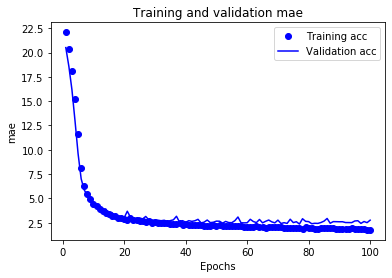

In [22]:

acc = history.history['mae']
val_acc = history.history['val_mae']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

# Hyperperameter Tunning

In [34]:
def tuning_model2(epochs,drop):
    print()
    models = tf.keras.models.Sequential
    layers = tf.keras.layers

    model2 = models([layers.Dense(64,input_shape = (input_shape,)),
                     layers.Dropout(drop),
                     layers.Dense(64,activation="relu"),
                     layers.Dense(64,activation="relu"),
                     layers.Dropout(drop),
                     layers.Dense(1)])
    
    model2.compile(optimizer="adam", # rmsprop # adam # 
             loss="mse", # binary_crossentropy
              metrics=["mae"])
    
    history = model.fit(x_train,y_train,epochs=epochs,validation_split=(0.2))
    
    evaluation = model.evaluate(x_test,y_test,verbose=2)
    print()
    print("loss: ",evaluation[0])
    print("MSE:  ",evaluation[1])

In [35]:
epochs = 100 #500
drop   = 0.03
fold = 4
tuning_model2(epochs,drop)


Train on 364 samples, validate on 91 samples
Epoch 1/100
364/364 [==============================] - 0s 261us/sample - loss: 6.2328 - mae: 1.8855 - val_loss: 15.0125 - val_mae: 2.3341
Epoch 2/100
364/364 [==============================] - 0s 258us/sample - loss: 6.2674 - mae: 1.8884 - val_loss: 13.2850 - val_mae: 2.2944
Epoch 3/100
364/364 [==============================] - 0s 253us/sample - loss: 5.8066 - mae: 1.8370 - val_loss: 13.2414 - val_mae: 2.3408
Epoch 4/100
364/364 [==============================] - 0s 255us/sample - loss: 5.9895 - mae: 1.8482 - val_loss: 13.3092 - val_mae: 2.2542
Epoch 5/100
364/364 [==============================] - 0s 272us/sample - loss: 5.7603 - mae: 1.8306 - val_loss: 13.5341 - val_mae: 2.4683
Epoch 6/100
364/364 [==============================] - 0s 255us/sample - loss: 5.5581 - mae: 1.7866 - val_loss: 13.9528 - val_mae: 2.4497
Epoch 7/100
364/364 [==============================] - 0s 222us/sample - loss: 5.5877 - mae: 1.8214 - val_loss: 13.4142 - val_

Epoch 60/100
364/364 [==============================] - 0s 239us/sample - loss: 3.4706 - mae: 1.4317 - val_loss: 13.9082 - val_mae: 2.4243
Epoch 61/100
364/364 [==============================] - 0s 239us/sample - loss: 3.4256 - mae: 1.4209 - val_loss: 12.9973 - val_mae: 2.2996
Epoch 62/100
364/364 [==============================] - 0s 236us/sample - loss: 3.7806 - mae: 1.5024 - val_loss: 14.0736 - val_mae: 2.3810
Epoch 63/100
364/364 [==============================] - 0s 269us/sample - loss: 3.3731 - mae: 1.3978 - val_loss: 13.3128 - val_mae: 2.2899
Epoch 64/100
364/364 [==============================] - 0s 250us/sample - loss: 3.4101 - mae: 1.4029 - val_loss: 14.4412 - val_mae: 2.4013
Epoch 65/100
364/364 [==============================] - 0s 233us/sample - loss: 3.1107 - mae: 1.3735 - val_loss: 13.7018 - val_mae: 2.3367
Epoch 66/100
364/364 [==============================] - 0s 264us/sample - loss: 3.5230 - mae: 1.4408 - val_loss: 14.2509 - val_mae: 2.3713
Epoch 67/100
364/364 [=====

# K-Fold

In [25]:
# Spliting in 90%, 10%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 13)
(455,)
(51, 13)
(51,)


In [26]:
input_shape = 13

models = tf.keras.Sequential
layers = tf.keras.layers

model1 = models([layers.Dense(64,activation="relu",input_shape=(input_shape,)),
                 layers.Dropout(drop),
                 layers.Dense(64,activation="relu"),
                 layers.Dense(64,activation="relu"),
                 layers.Dropout(drop),
                 layers.Dense(1)])

model1.compile(optimizer="rmsprop", # adam #rmsprop
             loss="mse",
             metrics=["mae"])


In [28]:
k = 4
num_val_samples = len(x_train) // 4
num_epochs = 3 #500
drop   = 0.03
all_scores = []
all_mae_histories = []

for i in range(k):
  print('processing fold # ', i)
  # prepare the validation data: data from partition # k
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare the training data: data from data - k
  partial_train_data = np.concatenate(                    
      [x_train[:i * num_val_samples],
      x_train[(i + 1 ) * num_val_samples:]],
  axis = 0)
  partial_train_targets = np.concatenate(
      [y_train[:i * num_val_samples],
      y_train[(i + 1 ) * num_val_samples:]],
  axis = 0)
  # Build the Keras Models (already commpiled)
  #model = build_model()
  # Train the model (in silence mode, verbose = 0)
  model1.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 1)
  # Evaluate the model on the validation data
  val_mse, val_mae = model1.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold #  0
Train on 342 samples
Epoch 1/3
342/342 [==============================] - 2s 6ms/sample - loss: 152.2834 - mae: 8.5514
Epoch 2/3
342/342 [==============================] - 1s 3ms/sample - loss: 25.8090 - mae: 3.5330
Epoch 3/3
342/342 [==============================] - 1s 3ms/sample - loss: 22.4931 - mae: 3.2686
processing fold #  1
Train on 342 samples
Epoch 1/3
342/342 [==============================] - 1s 3ms/sample - loss: 18.8700 - mae: 2.9576
Epoch 2/3
342/342 [==============================] - 1s 3ms/sample - loss: 16.6353 - mae: 2.7987
Epoch 3/3
342/342 [==============================] - 1s 3ms/sample - loss: 15.5041 - mae: 2.7018
processing fold #  2
Train on 342 samples
Epoch 1/3
342/342 [==============================] - 1s 3ms/sample - loss: 17.9711 - mae: 2.9445
Epoch 2/3
342/342 [==============================] - 1s 3ms/sample - loss: 16.1588 - mae: 2.8463
Epoch 3/3
342/342 [==============================] - 1s 3ms/sample - loss: 17.1966 - mae: 2.8952


In [29]:
print(all_scores)
print()
print(np.mean(all_scores))

[3.4443822, 2.9352527, 2.176864, 2.5903218]

2.786705


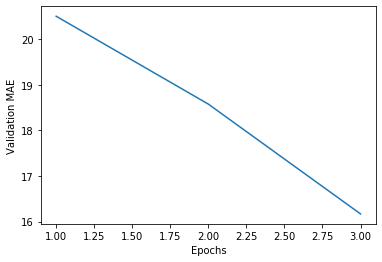

In [30]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1 ), average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

# Hyperperameter tuning K-fold

In [36]:
def tuning_model3(epochs,drop,fold):
    print()
    models = tf.keras.models.Sequential
    layers = tf.keras.layers

    model2 = models([layers.Dense(64,input_shape = (input_shape,)),
                     layers.Dropout(drop),
                     layers.Dense(64,activation="relu"),
                     layers.Dense(64,activation="relu"),
                     layers.Dropout(drop),
                     layers.Dense(1)])
    
    model2.compile(optimizer="adam", # rmsprop # adam # 
             loss="mse", # binary_crossentropy
              metrics=["mae"])
    
    k = fold
    num_val_samples = len(x_train) // 4
    #num_epochs = 500
    all_scores = []
    all_mae_histories = []

    for i in range(k):
      print('processing fold # ', i)
      # prepare the validation data: data from partition # k
      val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
      val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

      # prepare the training data: data from data - k
      partial_train_data = np.concatenate(                    
          [x_train[:i * num_val_samples],
          x_train[(i + 1 ) * num_val_samples:]],
      axis = 0)
      partial_train_targets = np.concatenate(
          [y_train[:i * num_val_samples],
          y_train[(i + 1 ) * num_val_samples:]],
      axis = 0)
      # Build the Keras Models (already commpiled)
      # model = build_model()
      # Train the model (in silence mode, verbose = 0)
      model2.fit(partial_train_data, partial_train_targets, epochs = epochs, batch_size = 1, verbose = 1)
      # Evaluate the model on the validation data
      val_mse, val_mae = model2.evaluate(val_data, val_targets, verbose = 0)
      all_scores.append(val_mae)

      mae_history = history.history['val_mae']
      all_mae_histories.append(mae_history)
    
    print(all_scores)
    print()
    print("mae :",np.mean(all_scores))
    print()

In [38]:
epochs = 50 #500
drop   = 0.03
fold = 4
tuning_model3(epochs,drop,fold)


processing fold #  0
Train on 342 samples
Epoch 1/50
342/342 [==============================] - 2s 5ms/sample - loss: 149.9662 - mae: 8.6194
Epoch 2/50
342/342 [==============================] - 1s 3ms/sample - loss: 28.0146 - mae: 3.7556
Epoch 3/50
342/342 [==============================] - 1s 3ms/sample - loss: 20.2148 - mae: 3.3175
Epoch 4/50
342/342 [==============================] - 1s 3ms/sample - loss: 18.8737 - mae: 3.1692
Epoch 5/50
342/342 [==============================] - 1s 4ms/sample - loss: 20.1904 - mae: 3.3245
Epoch 6/50
342/342 [==============================] - 1s 3ms/sample - loss: 18.8621 - mae: 3.1694
Epoch 7/50
342/342 [==============================] - 1s 3ms/sample - loss: 16.6526 - mae: 2.9000
Epoch 8/50
342/342 [==============================] - 1s 3ms/sample - loss: 17.2068 - mae: 2.9836
Epoch 9/50
342/342 [==============================] - 1s 3ms/sample - loss: 15.0440 - mae: 2.7936
Epoch 10/50
342/342 [==============================] - 1s 4ms/sample - los

342/342 [==============================] - 1s 3ms/sample - loss: 4.1939 - mae: 1.5894
Epoch 16/50
342/342 [==============================] - 1s 3ms/sample - loss: 4.4231 - mae: 1.5688
Epoch 17/50
342/342 [==============================] - 1s 3ms/sample - loss: 4.5607 - mae: 1.5544
Epoch 18/50
342/342 [==============================] - 1s 3ms/sample - loss: 4.1904 - mae: 1.5286
Epoch 19/50
342/342 [==============================] - 1s 3ms/sample - loss: 4.6803 - mae: 1.6268
Epoch 20/50
342/342 [==============================] - 1s 4ms/sample - loss: 3.5318 - mae: 1.4554
Epoch 21/50
342/342 [==============================] - 1s 3ms/sample - loss: 3.6529 - mae: 1.4509
Epoch 22/50
342/342 [==============================] - 1s 4ms/sample - loss: 4.3579 - mae: 1.5932
Epoch 23/50
342/342 [==============================] - 1s 3ms/sample - loss: 5.0302 - mae: 1.6417
Epoch 24/50
342/342 [==============================] - 1s 3ms/sample - loss: 3.5807 - mae: 1.4061
Epoch 25/50
342/342 [===========